In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_excel('edited_descriptors_noheights.xlsx')

In [3]:
data.head()

,CS2-1-K16-0,index,sortedSIGMA-c-1,sortedSIGMA-c-2,sortedSIGMA-c-3,sortedSIGMA-c-4,sortedSIGMA-c-5,sortedSIGMA-c-6,sortedSIGMA-c-7,sortedSIGMA-c-8,...,sortedloc-d-11,sortedloc-d-12,sortedloc-d-2,sortedloc-d-3,sortedloc-d-4,sortedloc-d-5,sortedloc-d-6,sortedloc-d-7,sortedloc-d-8,sortedloc-d-9
0,0,0,0.032438,0.026640,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0.029858,0.028182,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,0.032321,0.027009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,3,0.031219,0.025917,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,4,0.025165,0.026359,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['label'] = None
data.loc[data['CS2-1-K16-0'] == 1, 'label'] = 'LiCoO2'
data.loc[data['CS2-1-K16-0'] == 0, 'label'] = 'LiFePO4'

In [6]:
data = data.T.drop_duplicates().T
# drop any duplicates, but there shouldn't be
data = data.fillna(0)
# also replace all NAN values with zeros
data = data.drop(columns = 'index')

In [7]:
unique = data['CS2-1-K16-0'].unique()
print ("There are", len(unique), "unique batteries in this dataset: ", unique)

There are 2 unique batteries in this dataset:  [0 1]


In [8]:
#split up data into test train set 80/20

train,test = train_test_split(data, test_size=0.2, random_state=1010) # this gave 22.56%
#train,test = train_test_split(data, test_size=0.2, random_state=1011) 
#train,test = train_test_split(data, test_size=0.2, random_state=1111)# 20%
print (train.shape, test.shape)

(2340, 124) (585, 124)


In [9]:
allfeats = list(data.columns)
#print(list1)
allfeats.remove('CS2-1-K16-0')
allfeats.remove('label')
print(allfeats)

['sortedSIGMA-c-1', 'sortedSIGMA-c-2', 'sortedSIGMA-c-3', 'sortedSIGMA-c-4', 'sortedSIGMA-c-5', 'sortedSIGMA-c-6', 'sortedSIGMA-c-7', 'sortedSIGMA-c-8', 'num_peaks_c', 'sortedSIGMA-d-1', 'sortedSIGMA-d-10', 'sortedSIGMA-d-11', 'sortedSIGMA-d-12', 'sortedSIGMA-d-2', 'sortedSIGMA-d-3', 'sortedSIGMA-d-4', 'sortedSIGMA-d-5', 'sortedSIGMA-d-6', 'sortedSIGMA-d-7', 'sortedSIGMA-d-8', 'sortedSIGMA-d-9', 'num_peaks_d', 'sortedamplitude-c-1', 'sortedamplitude-c-2', 'sortedamplitude-c-3', 'sortedamplitude-c-4', 'sortedamplitude-c-5', 'sortedamplitude-c-6', 'sortedamplitude-c-7', 'sortedamplitude-c-8', 'sortedamplitude-d-1', 'sortedamplitude-d-10', 'sortedamplitude-d-11', 'sortedamplitude-d-12', 'sortedamplitude-d-2', 'sortedamplitude-d-3', 'sortedamplitude-d-4', 'sortedamplitude-d-5', 'sortedamplitude-d-6', 'sortedamplitude-d-7', 'sortedamplitude-d-8', 'sortedamplitude-d-9', 'sortedarea-c-1', 'sortedarea-c-2', 'sortedarea-c-3', 'sortedarea-c-4', 'sortedarea-c-5', 'sortedarea-c-6', 'sortedarea-c-7

In [10]:
#LASSO 
#feature selection
train_lasso_y = train['CS2-1-K16-0']
train_lasso_x = train[allfeats] #all the descriptors
test_lasso_y = test['CS2-1-K16-0']
test_lasso_x = test[allfeats]


train_lasso_x_scaled  = preprocessing.normalize(train_lasso_x, norm='l1')
test_lasso_x_scaled  = preprocessing.normalize(test_lasso_x, norm='l1')

In [11]:
clf = linear_model.Lasso(alpha=0.008, tol=0.0001 ,max_iter=5000)
#clf.fit(train_lasso_x_scaled,train_lasso_y)
clf.fit(train_lasso_x_scaled,train_lasso_y)
coef = clf.coef_

coef_data = pd.DataFrame(np.reshape(coef, (1, len(allfeats))), columns = allfeats)

#coef

In [12]:
coef_data.replace(0, np.nan, inplace=True)
coef_data.dropna(axis=1, how='any', inplace=True)

In [13]:
coef_data # this gives the features that were selected 

,sortedloc-c-1,sortedloc-c-2,sortedloc-c-3,sortedloc-c-5,sortedloc-d-2
0,-0.083075,-0.489839,0.3014,0.113295,0.155881


In [14]:
lassofeats = list(coef_data.columns)
# these are our descriptors

In [15]:
train_y = train['CS2-1-K16-0'] #what are we predicting 
test_y = test['CS2-1-K16-0']

train_x = train[lassofeats] #from LASSO 
test_x = test[lassofeats]

train_x_scaled  = preprocessing.normalize(train_x, norm='l1')
test_x_scaled  = preprocessing.normalize(test_x, norm='l1')

#print (train_y.shape, train_x.shape) #check y should by (datapoints,), x should by (datapoints,descriptors)

print ("Data points in train/test: ",train_x.shape[0],"/", test_x.shape[0])

Data points in train/test:  2340 / 585


In [16]:
#Support Vector Machine 
#-->Chosen under the assumption that eventually more batteries will be added with highly dimensional features that 
# can not be seperated by simple linear or logistic regression models 

lin_svc = svm.LinearSVC(max_iter =10000).fit(train_x, train_y)
trainpred=lin_svc.predict(train_x_scaled) #predict train data 
testpred=lin_svc.predict(test_x_scaled)

In [17]:
def accuracy(test_df,pred_df):
    """Calculates the amount of data classified correctly"""
    #Input for test_y should be the test dataframe (ex -- see below)
    N= len(pred_df)
    compare = np.array([test_df['CS2-1-K16-0'], pred_df]).reshape(N,2)
    asses = pd.DataFrame (compare, columns = ['actual','predicted'])
    count = 0
    correct = 0
    for i in range(len(compare)):
        if asses.loc[i,('actual')] == asses.loc[i, ('predicted')]:
            correct += 1 
            count += 1 
            asses.loc[i, ('correct')] = 1
        else: 
            count += 1
            asses.loc[i, ('correct')] = 0
    #print (correct)
    return (1-correct/count)*100, asses

In [18]:
test_error, test_df,  = accuracy(test,testpred)
train_error, train_df,  = accuracy(train,trainpred)
print ("Testing error: ","%.2f" %test_error,"%")
print ("Training error: ","%.2f" %train_error,"%")

Testing error:  25.81 %
Training error:  22.74 %


In [20]:
train_df

,actual,predicted,correct
0,0,1,0.0
1,1,0,0.0
2,0,0,1.0
3,0,0,1.0
4,1,0,0.0
5,0,0,1.0
6,1,0,0.0
7,1,0,0.0
8,0,0,1.0
9,1,0,0.0


In [19]:
newfeats = lassofeats
newfeats.append('label')
pd_train_y = pd.DataFrame(train['label'])
frames = [train_x,pd_train_y]
datatot = pd.concat(frames, axis=1, ignore_index = True)
datatot.columns = newfeats
datatot.head()

,sortedloc-c-1,sortedloc-c-2,sortedloc-c-3,sortedloc-c-5,sortedloc-d-2,label
4,3.357761,3.440510,0.000000,0.0,3.165222,LiFePO4
14,0.000000,0.000000,0.000000,0.0,0.000000,LiCoO2
10,3.818899,0.000000,3.902162,0.0,0.000000,LiCoO2
17,3.376222,3.463504,0.000000,0.0,0.000000,LiFePO4
42,3.383185,3.465933,0.000000,0.0,0.000000,LiFePO4


In [80]:
newfeats

['sortedloc-c-1',
 'sortedloc-c-2',
 'sortedloc-c-3',
 'sortedloc-c-5',
 'sortedloc-d-2',
 'label']

In [81]:
plt.rcParams.update({'font.size':12})

colors = ['red', 'blue']
datatot = datatot.reset_index(drop = True)
for i in range(len(datatot)):
    if datatot.loc[i, ('label')] == 'LiCoO2':
        datatot.loc[i, ('Color')] = 'R'
    elif datatot.loc[i, ('label')] == 'LiFePO4':
        datatot.loc[i, ('Color')] = 'B'
    else: 
        test_x.loc[i, ('Color')] = 'G'
#plt.scatter([datatot['ch_7'], datatot['dc_5'], datatot['ch_5'], c = datatot['Color'])
datatot.head()

,sortedloc-c-1,sortedloc-c-2,sortedloc-c-3,sortedloc-c-5,sortedloc-d-2,label,Color
0,3.357761,3.440510,0.000000,0.0,3.165222,LiFePO4,B
1,0.000000,0.000000,0.000000,0.0,0.000000,LiCoO2,R
2,3.818899,0.000000,3.902162,0.0,0.000000,LiCoO2,R
3,3.376222,3.463504,0.000000,0.0,0.000000,LiFePO4,B
4,3.383185,3.465933,0.000000,0.0,0.000000,LiFePO4,B


In [82]:
plt.rcParams.update({'font.size':12})

colors = ['red', 'blue']
test_df = test_df.reset_index(drop = True)
test_x = test_x.reset_index(drop = True)
for i in range(len(test_df)):
    if test_df.loc[i, ('correct')] == 0:
        test_x.loc[i, ('Predicted Col')] = 'G'
    elif (test_df.loc[i, ('correct')] == 1) and (test_df.loc[i, ('actual')] == 1) :
        test_x.loc[i, ('Predicted Col')] = 'B'
    elif (test_df.loc[i, ('correct')] == 1) and (test_df.loc[i, ('actual')] == 0) :
        test_x.loc[i, ('Predicted Col')] = 'R'
    else:
        test_x.loc[i, ('Predicted Col')] = 'G'        
test_x.head()

,sortedloc-c-1,sortedloc-c-2,sortedloc-c-3,sortedloc-c-5,sortedloc-d-2,Predicted Col
0,3.359380,3.444882,0.000000,0.0,0.0,R
1,3.361648,0.000000,3.447311,0.0,0.0,G
2,3.388691,3.466419,0.000000,0.0,0.0,G
3,0.000000,0.000000,0.000000,0.0,0.0,R
4,0.000000,4.190670,4.190670,0.0,0.0,G


In [83]:
d1height = lassofeats[1] 
c2height = lassofeats[0]
d4height = lassofeats[2]

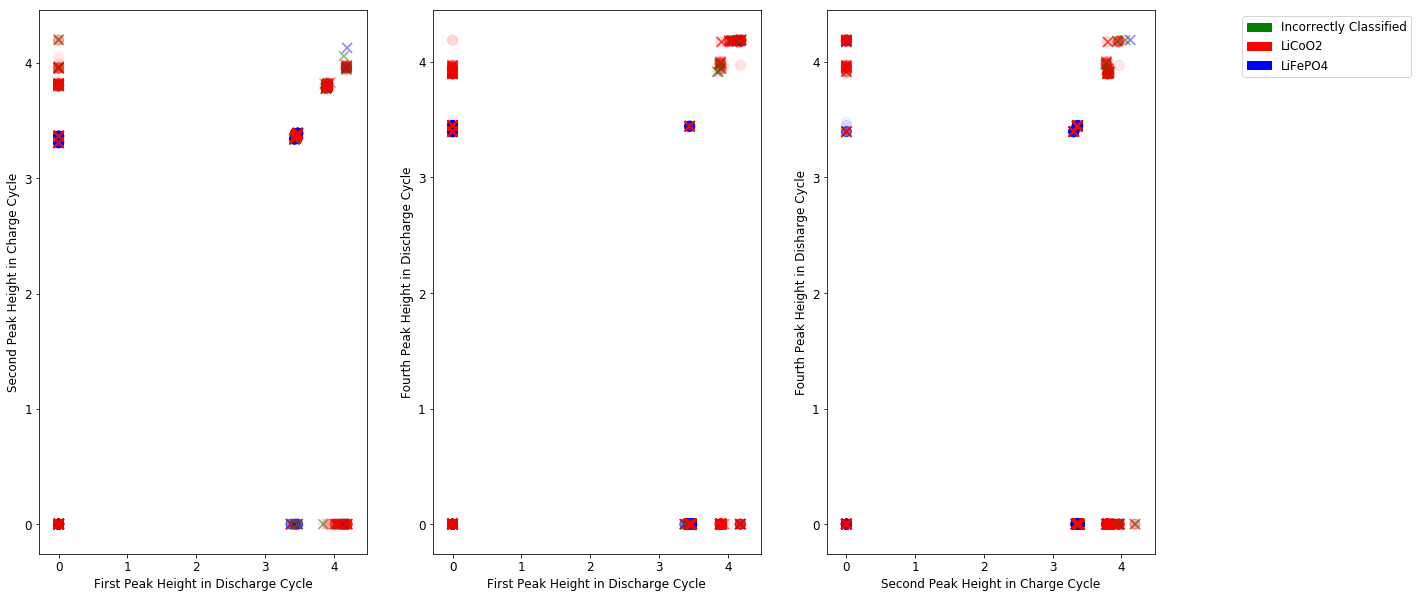

In [57]:
#x's are test data
#circles are training data

# datatotsample = datatot.sample(frac = 0.5, random_state=1)
# datatotsample.reset_index(inplace = True)
# test_xsample = test_x.sample(frac = 0.03, random_state = 2)
# test_xsample.reset_index(inplace = True)

datatotsample = datatot
test_xsample = test_x

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(20, 10))

#d1height and c2height
ax1.scatter(datatotsample[d1height], datatotsample[c2height], c = datatotsample['Color'], alpha=0.05, s=100, zorder = 1)
ax1.scatter(test_xsample[d1height], test_xsample[c2height], c = test_xsample['Predicted Col'], alpha=0.5, marker = "x", s = 100,zorder = 2)
ax1.set_xlabel('First Peak Height in Discharge Cycle')
ax1.set_ylabel('Second Peak Height in Charge Cycle')

#d1height and d4height
ax2.scatter(datatotsample[d1height], datatotsample[d4height], c = datatotsample['Color'], alpha=0.05, s=100, zorder = 1)
ax2.scatter(test_xsample[d1height], test_xsample[d4height], c = test_xsample['Predicted Col'], alpha=0.5, marker = "x", s = 100, zorder = 2)
ax2.set_xlabel('First Peak Height in Discharge Cycle')
ax2.set_ylabel('Fourth Peak Height in Discharge Cycle')

#d4height and c2height
ax3.scatter(datatotsample[c2height], datatotsample[d4height], c = datatotsample['Color'], alpha=0.05, s=100, zorder = 1)
ax3.scatter(test_xsample[c2height], test_xsample[d4height], c = test_xsample['Predicted Col'], marker = "x", alpha = 0.5, s= 100, zorder = 2)
ax3.set_xlabel('Second Peak Height in Charge Cycle')
ax3.set_ylabel('Fourth Peak Height in Disharge Cycle')

legend_dict = { 'Incorrectly Classified' : 'green', 'LiCoO2' : 'red', 'LiFePO4' : 'blue' }
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)
plt.legend(handles=patchList,loc='upper right', bbox_to_anchor=(1.8, 1.0))
plt.rcParams.update({'font.size': 18})
plt.savefig('legend.png', bbox_inches='tight', dpi = 600)

plt.show()